Probar de dónde viene el método describe     

In [16]:
from pandas import DataFrame
from pandas import read_csv

df = read_csv('../datos/house/train.csv')
df.head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [18]:
import numpy as np
import pandas as pd
 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, RobustScaler
 
from sklearn.tree import plot_tree
 
from matplotlib import pyplot as plt


In [19]:

def preprocess(df):
    cols_no = [col for col in df.columns if col not in ['LotArea', 'SalePrice']]
    df['Pool'] = (df['PoolArea'] > 0).astype('int64')
    df['NewConstruction'] = (df['SaleType'] == 'New').astype('int64')
    df['SalePrice'] = df['SalePrice'] // 1000
    #df = df.drop(columns=cols_no)
    df = df[['NewConstruction', 'Pool', 'LotArea', 'SalePrice']]
 
    return df

df = preprocess(df)
df.head()

,NewConstruction,Pool,LotArea,SalePrice
0,0,0,8450,208
1,0,0,9600,181
2,0,0,11250,223
3,0,0,9550,140
4,0,0,14260,250


In [20]:
train, test = train_test_split(df, test_size = 0.3, random_state=42)

In [24]:
model = DecisionTreeRegressor(min_samples_split=100)
model.fit(X=train.drop(columns=['SalePrice']), y=train['SalePrice'])

DecisionTreeRegressor(min_samples_split=100)

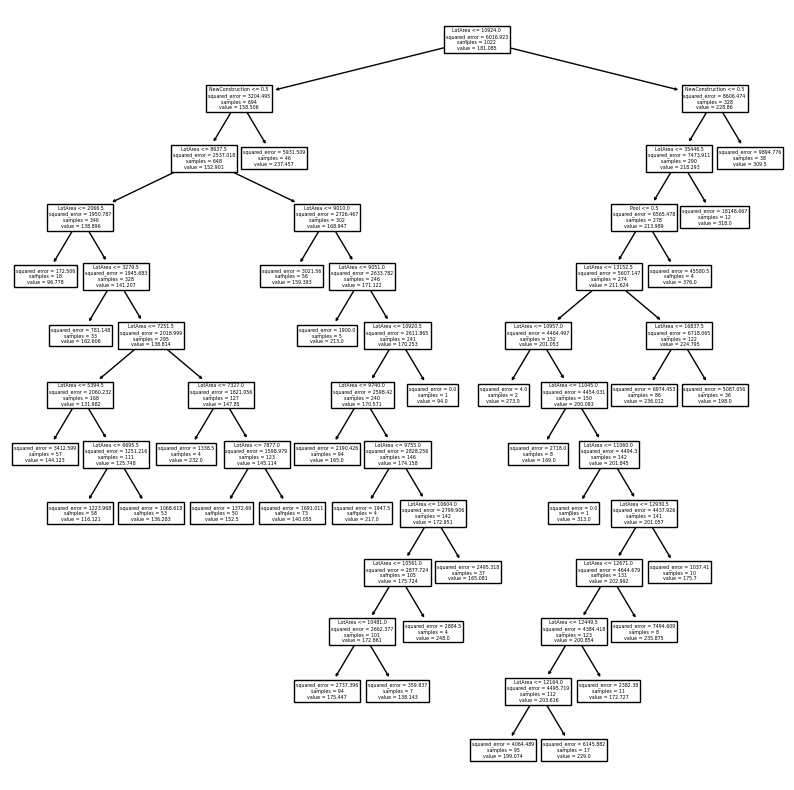

In [25]:
plt.figure(figsize=(10,10))
plot_tree(model,feature_names=['NewConstruction', 'Pool', 'LotArea'], impurity=True)
plt.show()

In [26]:
inputs = pd.DataFrame([{'NewConstruction': 0, 'Pool': 0, 'LotArea': 6000}])
model.predict(inputs)

array([116.12068966])

In [29]:
print(f"RMSE: {mean_squared_error(test['SalePrice'], model.predict(test.drop(columns=['SalePrice'])))}")
print(f'R2: {r2_score(test["SalePrice"], model.predict(test.drop(columns=["SalePrice"])))}')

RMSE: 4996.749018323385
R2: 0.2843220166710343
